<a href="https://colab.research.google.com/github/SamChumsl/Python-Certificate-Generator/blob/main/20_Project_1_Certificate_Generator_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cert Generator

### Goal of this project is to:

1. `Do simple Data Analysis`
    - Deal with missing values
    - Format the date or text

2. `Enchance Python Concepts`
3. `Explore more 3rd party libraries - reportlab`

---

Before starting,

Make sure the students have the `Starting Project Template` Google Drive Folder shared to them so that they can reupload to their own drive

---


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# install external package "reportlab" because it is not in normal python
# "reportlab" is a library to link pdf to python program

!pip install reportlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

from reportlab.lib.pagesizes import landscape, A4
from reportlab.pdfgen import canvas
from reportlab.lib.units import inch
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont

import os

---
## 2. Reading and Exploring the Excel File
---

In [ ]:
#Import the file dataset into your colab

df = pd.read_excel('/content/drive/MyDrive/1.2 Python Certificate Generator Project (STARTING TEMPLATE)/dataset.xlsx')

In [ ]:
df =pd.read_excel('/content/drive/MyDrive/1.2 Python Certificate Generator Project (STARTING TEMPLATE)/dataset.xlsx')

In [ ]:
df

,Name,Course,CourseLevel,Date
0,Christy Cunningham,Python,Beginner,2023-09-10
1,Douglas Tucker,PYTHON,MASTER,2023-09-11
2,Travis Walters,Java,Intermediate,2023-09-12
3,Nathaniel Harris,Web Development,Advanced,2023-09-13
4,-,NaN,Advanced,NaT
5,Tonya Carter,AI & Machine Learning,Beginner,2023-09-14
6,Erik Smith,Mobile Development,Beginner,2023-09-15
7,Kristopher Johnson,Python,Beginner,2023-09-16
8,Jonathan Bucker,NaN,NaN,NaT
9,Robert Buck,PYTHON,Master,2023-09-17


In [ ]:
df.info() # information about the dataset

#non-null (not empty) --> 11 non-null --> none of the 11 rows are empty (there is data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         13 non-null     object        
 1   Course       11 non-null     object        
 2   CourseLevel  12 non-null     object        
 3   Date         11 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 544.0+ bytes


---
## 3. Data Cleaning (Data analysis)

`Data cleaning` - Formatting the data before doing the certificate generator logic

- Deal with missing values
- Format the date or text

---

In [ ]:
df

,Name,Course,CourseLevel,Date
0,Christy Cunningham,Python,Beginner,2023-09-10
1,Douglas Tucker,PYTHON,MASTER,2023-09-11
2,Travis Walters,Java,Intermediate,2023-09-12
3,Nathaniel Harris,Web Development,Advanced,2023-09-13
4,-,NaN,Advanced,NaT
5,Tonya Carter,AI & Machine Learning,Beginner,2023-09-14
6,Erik Smith,Mobile Development,Beginner,2023-09-15
7,Kristopher Johnson,Python,Beginner,2023-09-16
8,Jonathan Bucker,NaN,NaN,NaT
9,Robert Buck,PYTHON,Master,2023-09-17


In [ ]:
# the 3 problems with the original dataset (raw excel file)

# 1. Inconsistency formatting in "Course" & "CourseLevel" columns - (some are capitalized but some are uppercase)
# 2. Date format (yyyy/mm/dd) --> we want to change into (dd/mm/yyyy)
# 3. Empty rows (half empty row 4 & 8)

# we are going to solve these problems using Data analysis with Pandas!

#Dealing with missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         13 non-null     object        
 1   Course       11 non-null     object        
 2   CourseLevel  12 non-null     object        
 3   Date         11 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 544.0+ bytes


In [ ]:
df.isnull()

,Name,Course,CourseLevel,Date
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,True,False,True
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,True,True,True
9,False,False,False,False


In [ ]:
df = df.dropna()# drop all the rows that have AT LEAST 1 empty column

In [ ]:
df

,Name,Course,CourseLevel,Date
0,Christy Cunningham,Python,Beginner,2023-09-10
1,Douglas Tucker,PYTHON,MASTER,2023-09-11
2,Travis Walters,Java,Intermediate,2023-09-12
3,Nathaniel Harris,Web Development,Advanced,2023-09-13
5,Tonya Carter,AI & Machine Learning,Beginner,2023-09-14
6,Erik Smith,Mobile Development,Beginner,2023-09-15
7,Kristopher Johnson,Python,Beginner,2023-09-16
9,Robert Buck,PYTHON,Master,2023-09-17
10,Joseph Mcdonald,Java,Intermediate,2023-09-18
11,Jerome Abbott,Web Development,Advanced,2023-09-19


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 0 to 12
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         11 non-null     object        
 1   Course       11 non-null     object        
 2   CourseLevel  11 non-null     object        
 3   Date         11 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 440.0+ bytes


#Dealing with dates

In [ ]:
#Date format (yyyy/mm/dd) --> we want to change into (dd/mm/yyyy)

df['Date']

0    2023-09-10
1    2023-09-11
2    2023-09-12
3    2023-09-13
5    2023-09-14
6    2023-09-15
7    2023-09-16
9    2023-09-17
10   2023-09-18
11   2023-09-19
12   2023-09-20
Name: Date, dtype: datetime64[ns]

In [ ]:
# let's look at one of the rows of "Date"

df['Date'].iloc[0]# .iloc[0] --> index location of 0 (the first row)

# For example, we need to change  Timestamp('2023-09-10 00:00:00') --> "10/09/2023"

Timestamp('2023-09-10 00:00:00')

In [ ]:
# create a new column called "Formatted Date", and base it off of df["Date"]

df['FormatedDate'] = df["Date"].dt.strftime("%d/%m/%Y")

<ipython-input-17-dd4cbf079b85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FormatedDate'] = df["Date"].dt.strftime("%d/%m/%Y")


In [ ]:
df

,Name,Course,CourseLevel,Date,FormatedDate
0,Christy Cunningham,Python,Beginner,2023-09-10,10/09/2023
1,Douglas Tucker,PYTHON,MASTER,2023-09-11,11/09/2023
2,Travis Walters,Java,Intermediate,2023-09-12,12/09/2023
3,Nathaniel Harris,Web Development,Advanced,2023-09-13,13/09/2023
5,Tonya Carter,AI & Machine Learning,Beginner,2023-09-14,14/09/2023
6,Erik Smith,Mobile Development,Beginner,2023-09-15,15/09/2023
7,Kristopher Johnson,Python,Beginner,2023-09-16,16/09/2023
9,Robert Buck,PYTHON,Master,2023-09-17,17/09/2023
10,Joseph Mcdonald,Java,Intermediate,2023-09-18,18/09/2023
11,Jerome Abbott,Web Development,Advanced,2023-09-19,19/09/2023


In [ ]:
# remove the "Date" column (because it is useless to us)

df = df.drop("Date", axis = 1)

In [ ]:
df

,Name,Course,CourseLevel,FormatedDate
0,Christy Cunningham,Python,Beginner,10/09/2023
1,Douglas Tucker,PYTHON,MASTER,11/09/2023
2,Travis Walters,Java,Intermediate,12/09/2023
3,Nathaniel Harris,Web Development,Advanced,13/09/2023
5,Tonya Carter,AI & Machine Learning,Beginner,14/09/2023
6,Erik Smith,Mobile Development,Beginner,15/09/2023
7,Kristopher Johnson,Python,Beginner,16/09/2023
9,Robert Buck,PYTHON,Master,17/09/2023
10,Joseph Mcdonald,Java,Intermediate,18/09/2023
11,Jerome Abbott,Web Development,Advanced,19/09/2023


#Dealing with alphabetical format

In [ ]:
#Inconsistency formatting in "Course" & "CourseLevel" columns - (some are capitalized but some are uppercase)

df['Course'] = df['Course'].str.capitalize()

In [ ]:
df

,Name,Course,CourseLevel,FormatedDate
0,Christy Cunningham,Python,Beginner,10/09/2023
1,Douglas Tucker,Python,MASTER,11/09/2023
2,Travis Walters,Java,Intermediate,12/09/2023
3,Nathaniel Harris,Web development,Advanced,13/09/2023
5,Tonya Carter,Ai & machine learning,Beginner,14/09/2023
6,Erik Smith,Mobile development,Beginner,15/09/2023
7,Kristopher Johnson,Python,Beginner,16/09/2023
9,Robert Buck,Python,Master,17/09/2023
10,Joseph Mcdonald,Java,Intermediate,18/09/2023
11,Jerome Abbott,Web development,Advanced,19/09/2023


In [ ]:
df['CourseLevel'] = df['CourseLevel'].str.capitalize()

df

,Name,Course,CourseLevel,FormatedDate
0,Christy Cunningham,Python,Beginner,10/09/2023
1,Douglas Tucker,Python,Master,11/09/2023
2,Travis Walters,Java,Intermediate,12/09/2023
3,Nathaniel Harris,Web development,Advanced,13/09/2023
5,Tonya Carter,Ai & machine learning,Beginner,14/09/2023
6,Erik Smith,Mobile development,Beginner,15/09/2023
7,Kristopher Johnson,Python,Beginner,16/09/2023
9,Robert Buck,Python,Master,17/09/2023
10,Joseph Mcdonald,Java,Intermediate,18/09/2023
11,Jerome Abbott,Web development,Advanced,19/09/2023


In [ ]:
df['Name'] = df['Name'].str.capitalize()

df

,Name,Course,CourseLevel,FormatedDate
0,Christy cunningham,Python,Beginner,10/09/2023
1,Douglas tucker,Python,Master,11/09/2023
2,Travis walters,Java,Intermediate,12/09/2023
3,Nathaniel harris,Web development,Advanced,13/09/2023
5,Tonya carter,Ai & machine learning,Beginner,14/09/2023
6,Erik smith,Mobile development,Beginner,15/09/2023
7,Kristopher johnson,Python,Beginner,16/09/2023
9,Robert buck,Python,Master,17/09/2023
10,Joseph mcdonald,Java,Intermediate,18/09/2023
11,Jerome abbott,Web development,Advanced,19/09/2023


## 4. Registering Fonts

In [ ]:
fonts_path = '/content/drive/MyDrive/1.2 Python Certificate Generator Project (STARTING TEMPLATE)/fonts'

# Defining the path to the fonts folder (it is like storing a string inside 'fonts_path' variable)

In [ ]:
 # registering 2 fonts into this project
 #pdfmetrics is 1 of the packages we imported! (this package is used to register fonts so that we can use it with pdf files)

pdfmetrics.registerFont(TTFont('Lora-Bold', os.path.join(fonts_path, "Lora-Bold.ttf")))


# Register Lora-Regular font
pdfmetrics.registerFont(TTFont('Lora-Regular', os.path.join(fonts_path, "Lora-Regular.ttf")))

In [ ]:
#after registering, we can use these fonts in the project later!

#5.Building the Logic for certificate generator

In [ ]:
sum(2,2)

### Version 1 of the Function

- have `checkpoints` with the students and `use the function from time to time`
- when the function is used, ask students to check their `certificates` folder in google drive (refresh a few times)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 0 to 12
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          11 non-null     object
 1   Course        11 non-null     object
 2   CourseLevel   11 non-null     object
 3   FormatedDate  11 non-null     object
dtypes: object(4)
memory usage: 440.0+ bytes


In [ ]:
# in this function, the logic of creating a cert generator will be inside!
# this function will receive 4 inputs (name,courseName,courseLevel,date)

# we are going to REUSE THIS FUNCTION 11 times (since there are 11 students) - using a for loop
# for each student, this function will receive their name, course, level & date (4 inputs)

def certificate_generator(Name,Course,CourseLevel,FormatedDate):
  # Step 1
  # store the generated file name inside a variable "pdf_file_name"
  # For example, when using this function (to create Christy Cunningham's cert) --> ChristyCunningham-python-beginner.pdf
  pdf_file_name = '/content/drive/MyDrive/1.2 Python Certificate Generator Project (STARTING TEMPLATE)/certificates/' + Name + "-" + Course + "-" + CourseLevel + '.pdf'


  #Step2
  #canvas = blankscreen (A4 landscape size)
  #We are storing this canvas inside this file path (pdf_file_name)
  c = canvas.Canvas(pdf_file_name,pagesize = landscape(A4))


  #Step3 -> Drawing the template into the blank canvas
  #c.drawImage(1st Input,2nd input,3rd input,4th input,5th input)
  #1st input --> image --> what are u drawing on the empty canvas?? --> certifcate template
  #2nd input --> x axis (coordinate 0)
  #3rd input --> y axis (coodinate 0)
  # 4th input --> width --> A4[1] (using the A4 variable we imported)
  # 5th input -> Height --> 5th input --> height --> A4[0] (using the A4 variable we imported)


  c.drawImage('/content/drive/MyDrive/1.2 Python Certificate Generator Project (STARTING TEMPLATE)/certificate_template.jpg',0,0,width= A4[1],height = A4[0])

  # middle of the A4 page (width) --> middle because /2
  center_x = c._pagesize[0]/2 #O refer to width


  #crosscheck by printing
  #print("Full width of the A4: ", c._pagesize[0]) # full width of the A4 canvas size
  #print("Center of the A4 (x-axis): ", center_x) # center A4 canvas size (x-axis)

  center_y = c._pagesize[1]/2 #1 refer to length

  #crosscheck by printing
  #print("Full height of the A4: ", c._pagesize[1]) # full height of the A4 canvas size
  #print("Center of the A4 (y-axis): ", center_y) # center A4 canvas size (y-axis)


  #.drawString(input_1 = x_axis,input_2 = y_axis,input_3 = variable value to be printed on the canvas)

  # 1. Name
  c.setFont('Lora-Bold',30)
  #c.drawString(center_x - 30, center_y - 50, Name)#Qira
  c.drawCentredString(center_x,center_y-45,Name)#Sam

  # 2. CourseName
  c.setFont('Lora-Bold',28)
  #c.drawString(center_x,center_y,Course + "-" +CourseLevel)
  c.drawCentredString(center_x,center_y-105,Course + "-" +CourseLevel)#Sam

  # 3. Date
  c.setFont('Lora-Bold',17)
  c.drawCentredString(center_x+190,center_y-165,FormatedDate)

  #4.Certificate ID
  cert_id = "Cert_ID: " + str(pd.Timestamp.now().timestamp())# Generating a UNIQUE id based on current time (timestamp)
  c.setFont('Lora-Regular', 12)
  c.drawCentredString(center_x+200,center_y-230,cert_id)

  c.save() # save the canvas


In [ ]:
certificate_generator("Alvin","Python","Advance","20/06/2024")

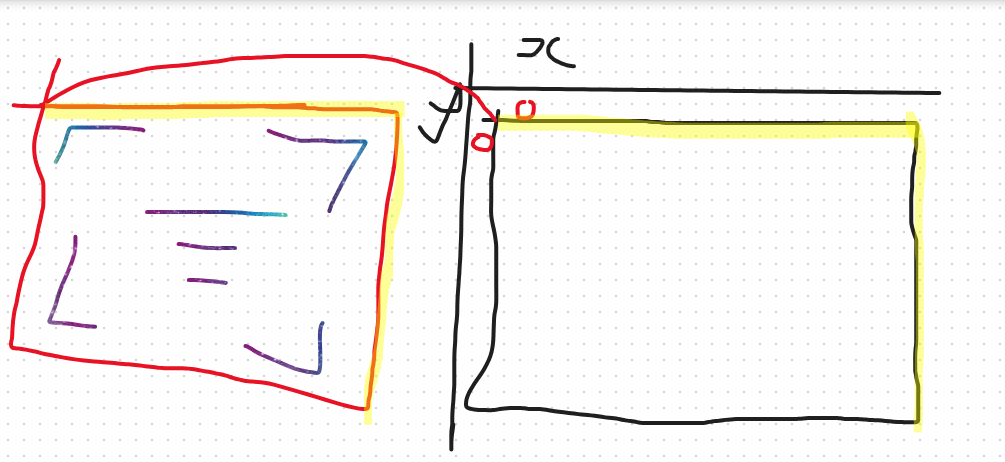

#Unix time stamp

In [ ]:
pd.Timestamp.now()

Timestamp('2024-06-06 13:38:30.384316')

In [ ]:
pd.Timestamp.now().timestamp()#UnixTimeStamp

1717681146.715087

In [ ]:
type(pd.Timestamp.now().timestamp())

float

In [ ]:
type(str(pd.Timestamp.now().timestamp()))

str

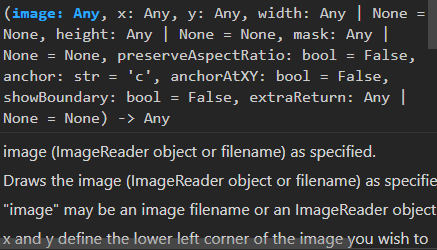

In [ ]:
df

,Name,Course,CourseLevel,FormatedDate
0,Christy cunningham,Python,Beginner,10/09/2023
1,Douglas tucker,Python,Master,11/09/2023
2,Travis walters,Java,Intermediate,12/09/2023
3,Nathaniel harris,Web development,Advanced,13/09/2023
5,Tonya carter,Ai & machine learning,Beginner,14/09/2023
6,Erik smith,Mobile development,Beginner,15/09/2023
7,Kristopher johnson,Python,Beginner,16/09/2023
9,Robert buck,Python,Master,17/09/2023
10,Joseph mcdonald,Java,Intermediate,18/09/2023
11,Jerome abbott,Web development,Advanced,19/09/2023


In [ ]:
# there are 11 students, the idea is USING THE FUNCTION 11 TIMES (with different 4 inputs --> (name,courseName,courseLevel,date))

# use a for loop --> loop 11 times --> use function 11 times based on different 4 inputs

#Generate certificates for each row in the DataFrame (11rows)
#execute this function 11 times --> generate 11 certs

for x in ["Apple","Orange","Grape"]:
  print(x)

Apple
Orange
Grape


In [ ]:
# df.iterrows gives u a loopable (array-like)
# df.iterrows gives you 2 items (index, item(row))

for index,row in df.iterrows():
  print(index)

0
1
2
3
5
6
7
9
10
11
12


In [ ]:
for index,row in df.iterrows():
  print(row)
  print("---------------------------------------")

Name            Christy cunningham
Course                      Python
CourseLevel               Beginner
FormatedDate            10/09/2023
Name: 0, dtype: object
---------------------------------------
Name            Douglas tucker
Course                  Python
CourseLevel            Master 
FormatedDate        11/09/2023
Name: 1, dtype: object
---------------------------------------
Name            Travis walters
Course                    Java
CourseLevel       Intermediate
FormatedDate        12/09/2023
Name: 2, dtype: object
---------------------------------------
Name            Nathaniel harris
Course           Web development
CourseLevel             Advanced
FormatedDate          13/09/2023
Name: 3, dtype: object
---------------------------------------
Name                     Tonya carter
Course          Ai & machine learning
CourseLevel                  Beginner
FormatedDate               14/09/2023
Name: 5, dtype: object
---------------------------------------
Name         

In [ ]:
# df.iterrows gives u a loopable (array-like)
# df.iterrows gives you 2 items (index, item(row))

for index, row in df.iterrows():
  certificate_generator(row['Name'],row["Course"],row["CourseLevel"],row["FormatedDate"])

print(str(len(df)) + " certificates generated successfully.")


11 certificates generated successfully.
